In [13]:
import pandas as pd

# URL da página da Série A 2019 – Cruzeiro (FBref)
url = "https://fbref.com/en/squads/03ff5eeb/2019/c24/Cruzeiro-Stats-Serie-A"

# Extrai todas as tabelas da página
tabelas = pd.read_html(url)

# A tabela de jogos geralmente está nas posições 0 ou 1
for idx, tabela in enumerate(tabelas):
    print(f"Tabela {idx} – colunas:", list(tabela.columns))

# Supondo que a tabela correta seja a segunda (índice 1), ajuste conforme necessário:
df = tabelas[1]

# Renomear colunas
df = df.rename(columns={
    'Date': 'Data',
    'Venue': 'Local',
    'Opponent': 'Adversário',
    'Result': 'Resultado',
    'GF': 'Gols Cruzeiro',
    'GA': 'Gols Adversário',
    'Attendance': 'Público'
})

# Selecionar colunas essenciais (filtre NaNs, se aparecerem)
df_final = df[['Data', 'Local', 'Adversário', 'Resultado', 'Gols Cruzeiro', 'Gols Adversário', 'Público']].dropna()

# Corrigir formato de 'Local' (Home/Away)
df_final['Local'] = df_final['Local'].apply(lambda x: 'Casa' if x == 'Home' else 'Fora')

# Converter colunas numéricas
# Garante que os valores são tratados como texto primeiro, depois convertidos em inteiro
df_final['Público'] = df_final['Público'].astype(str).str.replace(',', '').str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

df_final['Data'] = pd.to_datetime(df_final['Data']).dt.date

# Salvar o CSV
arquivo = "cruzeiro_2019_real.csv"
df_final.to_csv(arquivo, index=False)

print(f"✔️ Arquivo salvo: {arquivo}")
print(df_final.head())


Tabela 0 – colunas: [('Unnamed: 0_level_0', 'Player'), ('Unnamed: 1_level_0', 'Nation'), ('Unnamed: 2_level_0', 'Pos'), ('Unnamed: 3_level_0', 'Age'), ('Unnamed: 4_level_0', 'MP'), ('Playing Time', 'Starts'), ('Playing Time', 'Min'), ('Playing Time', '90s'), ('Performance', 'Gls'), ('Performance', 'Ast'), ('Performance', 'G+A'), ('Performance', 'G-PK'), ('Performance', 'PK'), ('Performance', 'PKatt'), ('Performance', 'CrdY'), ('Performance', 'CrdR'), ('Expected', 'xG'), ('Expected', 'npxG'), ('Expected', 'xAG'), ('Expected', 'npxG+xAG'), ('Progression', 'PrgC'), ('Progression', 'PrgP'), ('Progression', 'PrgR'), ('Per 90 Minutes', 'Gls'), ('Per 90 Minutes', 'Ast'), ('Per 90 Minutes', 'G+A'), ('Per 90 Minutes', 'G-PK'), ('Per 90 Minutes', 'G+A-PK'), ('Per 90 Minutes', 'xG'), ('Per 90 Minutes', 'xAG'), ('Per 90 Minutes', 'xG+xAG'), ('Per 90 Minutes', 'npxG'), ('Per 90 Minutes', 'npxG+xAG'), ('Unnamed: 33_level_0', 'Matches')]
Tabela 1 – colunas: ['Date', 'Time', 'Round', 'Day', 'Venue', '

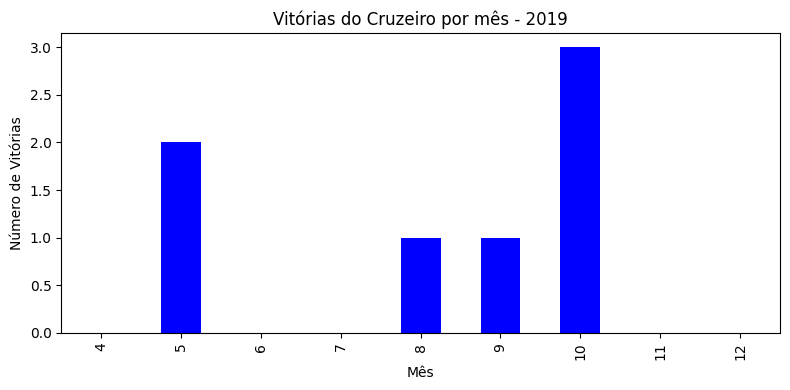

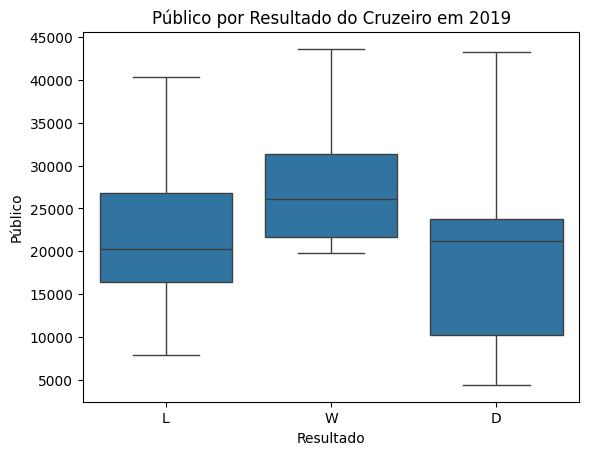

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o CSV
df = pd.read_csv("cruzeiro_2019_real.csv")

# Converte a data e cria colunas úteis
df['Data'] = pd.to_datetime(df['Data'])
df['Mês'] = df['Data'].dt.month

# Vitórias por mês
df['Vitória'] = df['Resultado'].apply(lambda x: 1 if x == 'W' else 0)
vit_mes = df.groupby('Mês')['Vitória'].sum()

plt.figure(figsize=(8, 4))
vit_mes.plot(kind='bar', color='blue')
plt.title("Vitórias do Cruzeiro por mês - 2019")
plt.xlabel("Mês")
plt.ylabel("Número de Vitórias")
plt.tight_layout()
plt.show()

# Público por resultado
sns.boxplot(data=df, x='Resultado', y='Público')
plt.title("Público por Resultado do Cruzeiro em 2019")
plt.show()
